In [164]:
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import pandas as pd
from keras.utils import to_categorical


### Load Images

In [165]:
# df = pd.read_csv('Test.csv')
# # # df['ClassId'].sort_values(ascending=True).unique()
# df.head()

In [166]:
train_data_dir = '../Mod 6 Project/Data/Train'
test_data_dir = '../Mod 6 Project/Data/Test2'

In [167]:
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), batch_size=1000)

test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), batch_size=100)

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 39209 images belonging to 43 classes.
Found 12630 images belonging to 1 classes.


In [183]:
train_labels.astype('int32')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [184]:
def to_one_hot(labels, dimension=43):
    labels = labels.astype('int32')
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [189]:
one_hot_train_labels.shape

(1000, 43)

In [174]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

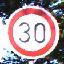

In [190]:
array_to_img(train_images[1])

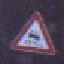

In [191]:
array_to_img(test_images[1])

In [192]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(1000, 64, 64, 3)
(1000, 43)
(100, 64, 64, 3)
(100, 1)


In [193]:
train_img_unrow = train_images.reshape(1000, -1).T
test_img_unrow = test_images.reshape(100, -1).T

In [200]:
train_labels_final = train_labels


In [201]:
test_labels_final = test_labels

In [196]:
train_img_final = train_img_unrow / 255
test_img_final = test_img_unrow / 255

In [202]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))


In [203]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4608)            

In [206]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, one_hot_train_labels, epochs=20, batch_size=64)

Epoch 1/20
1000/1000 [==============================] - 5s 5ms/step - loss: 46986.5874 - accuracy: 0.4250
Epoch 2/20
1000/1000 [==============================] - 5s 5ms/step - loss: 836766.7425 - accuracy: 0.5120
Epoch 3/20
1000/1000 [==============================] - 5s 5ms/step - loss: 3187159.8560 - accuracy: 0.5520
Epoch 4/20
1000/1000 [==============================] - 5s 5ms/step - loss: 7300352.0240 - accuracy: 0.5080
Epoch 5/20
1000/1000 [==============================] - 5s 5ms/step - loss: 14426394.6240 - accuracy: 0.5520
Epoch 6/20
1000/1000 [==============================] - 5s 5ms/step - loss: 26613428.2880 - accuracy: 0.4880
Epoch 7/20
1000/1000 [==============================] - 5s 5ms/step - loss: 40082426.2720 - accuracy: 0.5510
Epoch 8/20
1000/1000 [==============================] - 5s 5ms/step - loss: 62861876.3520 - accuracy: 0.5120
Epoch 9/20
1000/1000 [==============================] - 5s 5ms/step - loss: 90591218.1920 - accuracy: 0.5520
Epoch 10/20
1000/1000 [===

In [207]:
test_loss, test_acc = model.evaluate(test_images, one_hot_test_labels)

100/100 [==============================] - 0s 2ms/step


0.0